In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class BernoulliBandit:
    def __init__(self, p):
        self.p = p
        
    def display_ad(self):
        reward = np.random.binomial(1, self.p)
        return reward

In [3]:
adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)
ads = [adA, adB, adC, adD, adE]

# In the section below, we test the A/B/N algorithm for finding the best action

In [4]:
n_ads = len(ads)

Q = np.zeros(n_ads)
N = np.zeros(n_ads)

total_reward = 0
avg_rewards = []

### Training

In [5]:
for i in range(10000):
    ad_chosen = np.random.randint(n_ads)
    reward = ads[ad_chosen].display_ad()
    
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (reward - Q[ad_chosen])
    
    total_reward += reward
    avg_rewards.append(total_reward / (i + 1))

In [6]:
best_ad_index = np.argmax(Q)
print(f"Best ad: {chr(ord('A') + best_ad_index)}")

Best ad: E


### Testing

In [7]:
for i in range(90000):
    reward = ads[best_ad_index].display_ad()
    total_reward += reward
    
    avg_rewards.append(total_reward / (10000 + i + 1))

### Plotting the results

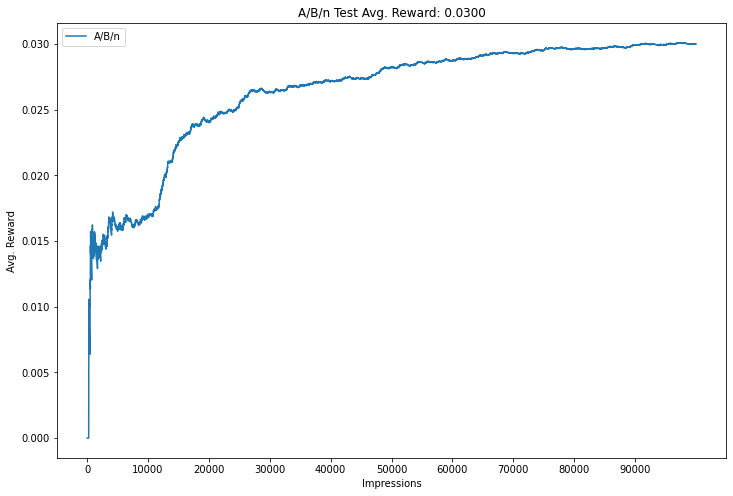

In [8]:
df_reward_comparison = pd.DataFrame(avg_rewards, columns=['A/B/n'])
df_reward_comparison.plot(figsize=(12, 8))

plt.title(f"A/B/n Test Avg. Reward: {avg_rewards[-1]:.4f}")
plt.xlabel("Impressions")
plt.ylabel("Avg. Reward")
plt.xticks(np.arange(0, len(avg_rewards), 10000))

plt.show()

# In the section below, we test the epsilon-greedy algorithm for finding the best action

In [9]:
eps = 0.1
n_ads = len(ads)

Q = np.zeros(n_ads)
N = np.zeros(n_ads)

total_reward = 0
avg_rewards = []

### Training and testing at the same time

In [10]:
ad_chosen = np.random.randint(n_ads)

for i in range(100000):
    reward = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (reward - Q[ad_chosen])
    
    total_reward += reward
    avg_rewards.append(total_reward / (i + 1))
    
    if np.random.rand() <= eps:
        ad_chosen = np.random.randint(n_ads)
    else:
        ad_chosen = np.argmax(Q)

### Plotting the results

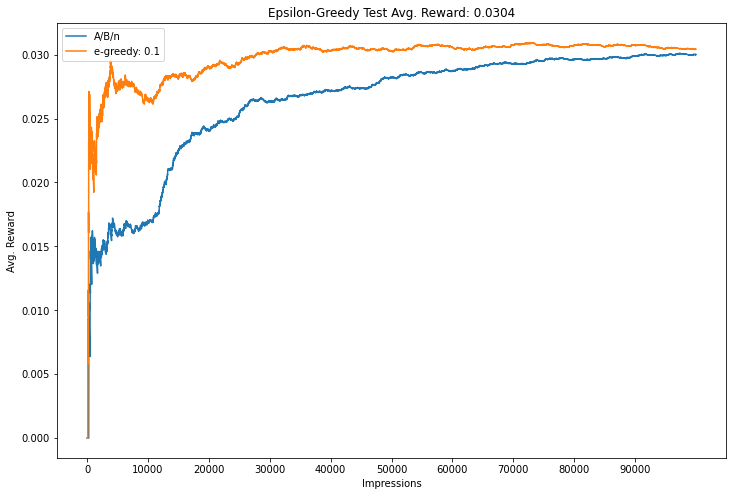

In [11]:
df_reward_comparison[f'e-greedy: {eps}'] = avg_rewards
df_reward_comparison.plot(figsize=(12, 8))

plt.title(f"Epsilon-Greedy Test Avg. Reward: {avg_rewards[-1]:.4f}")
plt.xlabel("Impressions")
plt.ylabel("Avg. Reward")
plt.xticks(np.arange(0, len(avg_rewards), 10000))

plt.show()